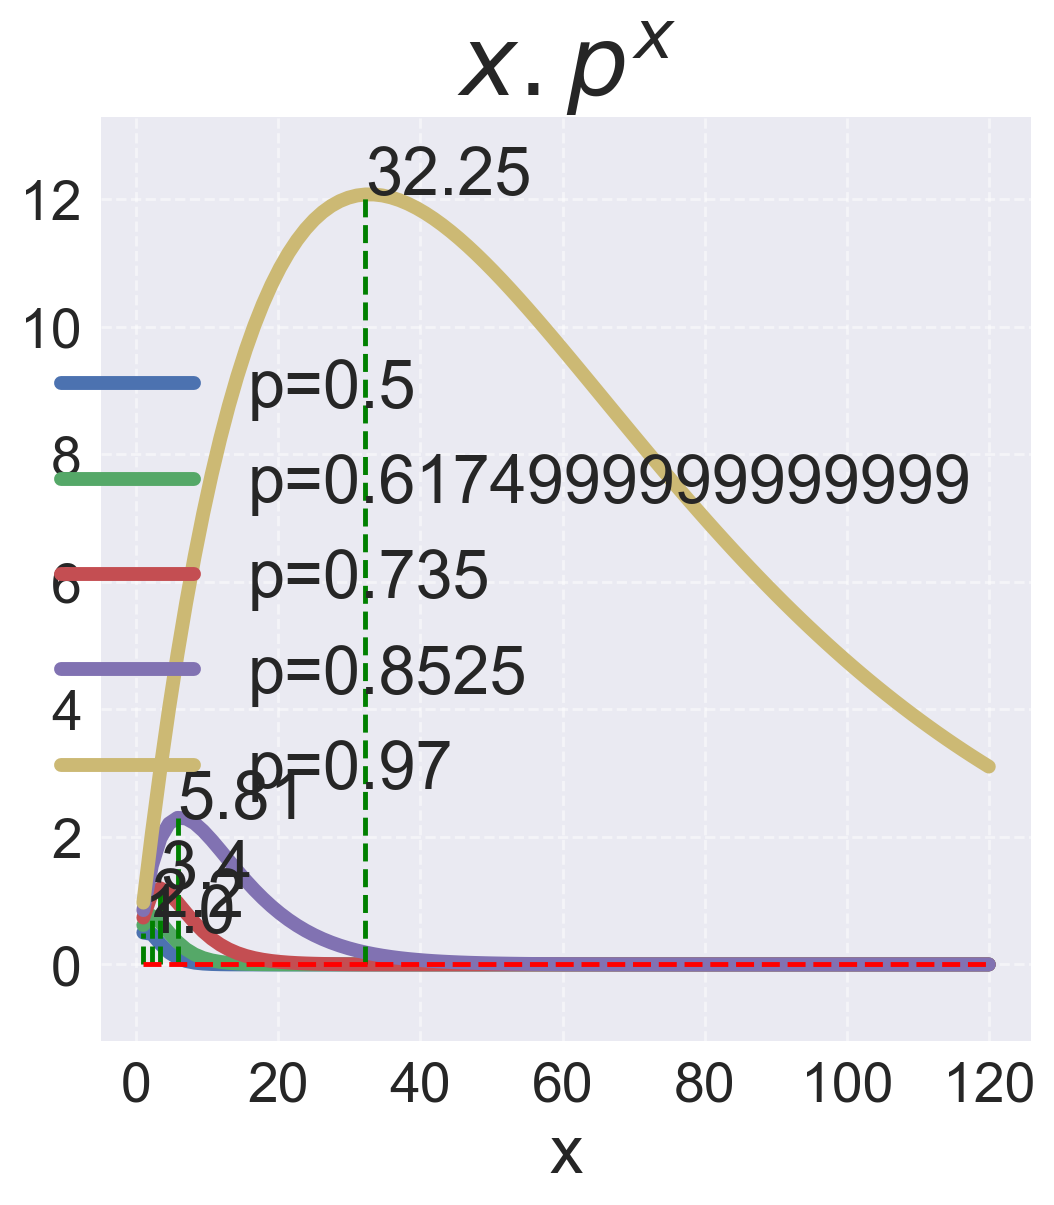

In [4]:
import numpy as np
import matplotlib.pyplot as plt

msg_nr = 120
ps = np.linspace(.5, .97, 5)
plt.style.use(plt.style.available[11])
plt.figure(figsize=(6, 6), dpi=200)

for p in ps:
    x = np.linspace(1, msg_nr, 100)
    y = x*p**(x)
    plt.plot(x, y, label='p={}'.format(p), linewidth=5)
    y_max = np.max(y)
    plt.vlines(x[np.argmax(y)], 0, y_max, colors='g', linestyles='dashed')
    plt.text(x[np.argmax(y)] , y_max, '{}'.format(np.round(x[np.argmax(y)],2)), fontsize=24)

plt.hlines(0, 1, msg_nr, colors='r', linestyles='dashed')
plt.title(r'$x.p^x $', fontsize=35)
plt.xlabel('x', fontsize=24)

plt.legend(fontsize=24)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0-y_max*0.1, y_max*1.1)
plt.show()




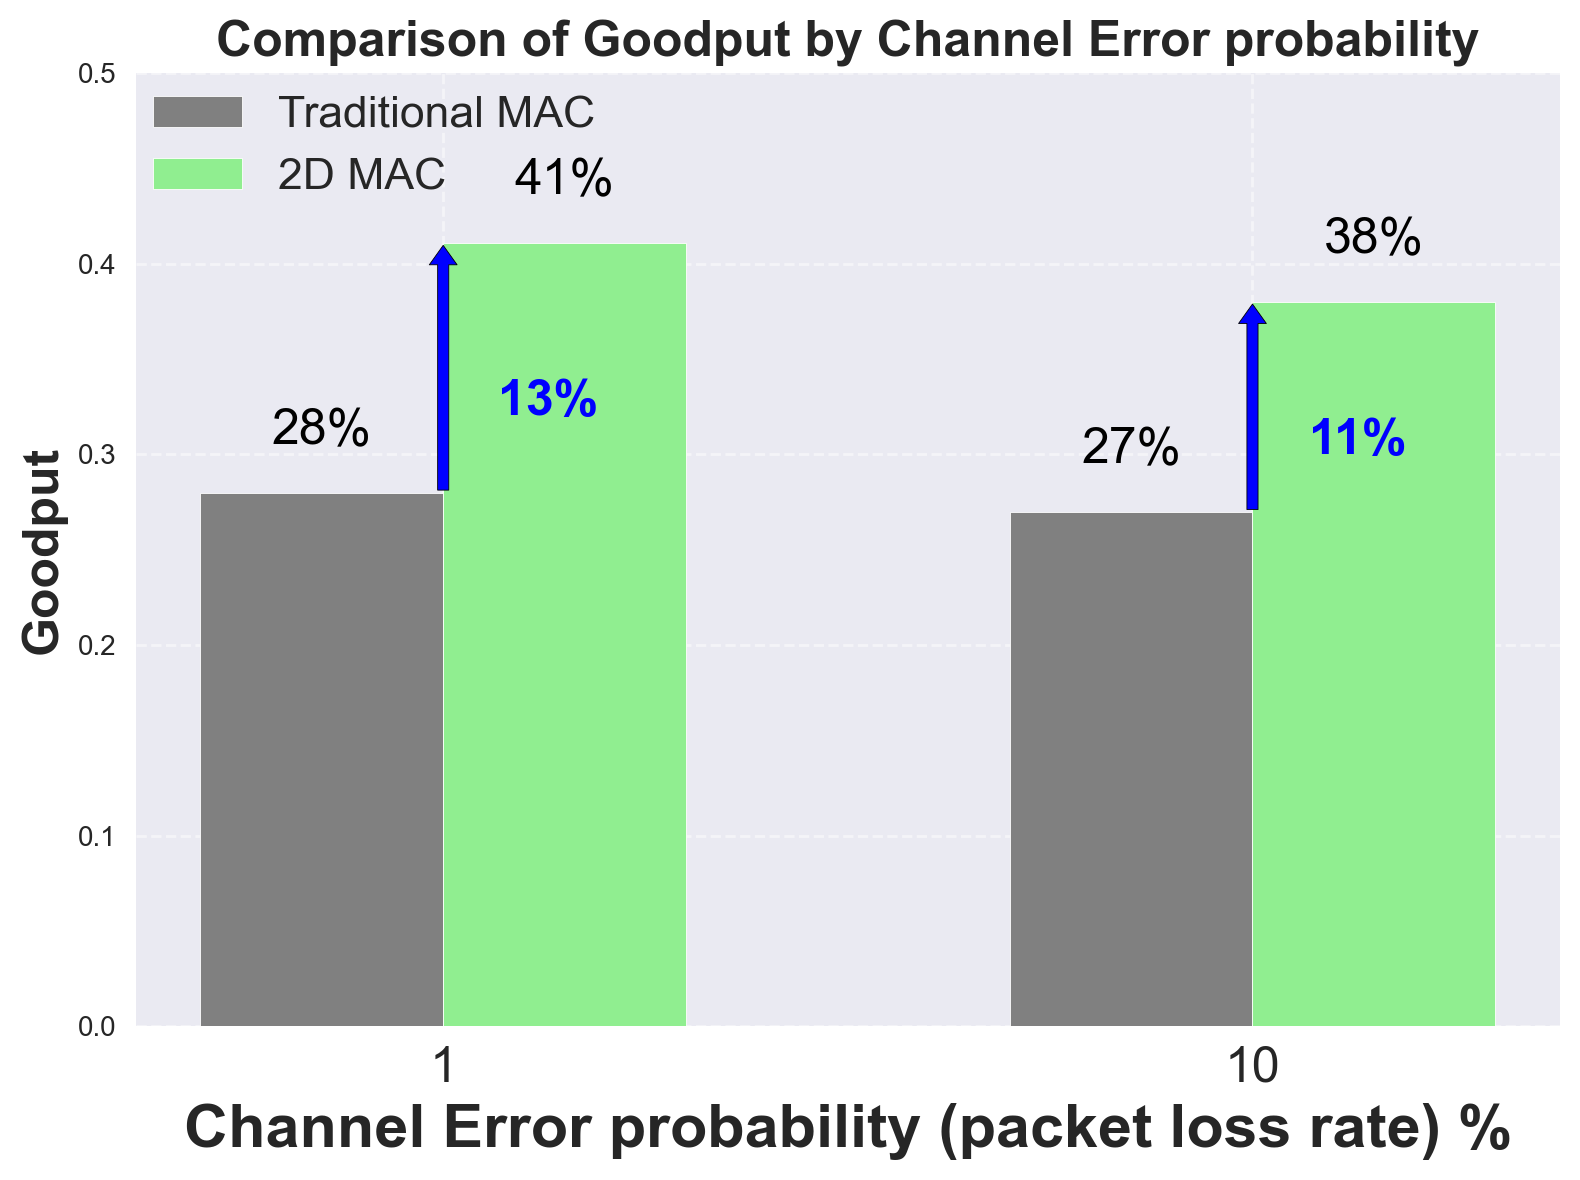

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided table
data = {
    "Channel quality (success probability)": [1, 10],
    "Current practice": [0.28, 0.27],
    "ZTX integrity check": [0.411, 0.38]
}


# Creating a DataFrame
df = pd.DataFrame(data)

improvements = [(ztx - current) * 100 for ztx, current in zip(df["ZTX integrity check"], df["Current practice"])]



# Set bar width
bar_width = 0.3

# Set positions for each bar
r1 = range(len(df))
r2 = [x + bar_width for x in r1]


# Plotting the bar chart with labels
plt.style.use(plt.style.available[11])
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)

# Plot bars with labels
bars1 = ax.bar(r1, df["Current practice"], color='gray', width=bar_width, edgecolor='white', label='Traditional MAC')
bars2 = ax.bar(r2, df["ZTX integrity check"], color='lightgreen', width=bar_width, edgecolor='white', label='2D MAC')

# # Add labels to bars
# for bar in bars1:
#     yval = bar.get_height()
#     ax.text(bar.get_x()+ bar.get_width()/4.0, yval, round(yval, 2), va='bottom', fontsize = 18)  # va: vertical alignment

# for bar in bars2:
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/4.0, yval, round(yval, 2), va='bottom',fontsize = 18)  # va: vertical alignment

for i, (current, ztx, improvement) in enumerate(zip(df["Current practice"], df["ZTX integrity check"], improvements)):
    ax.text(i, current + 0.02, f'{current*100:.0f}%', ha='center', va='bottom', color='black', fontsize = 18)
    ax.text(i + bar_width, ztx + 0.02, f'{ztx*100:.0f}%', ha='center', va='bottom', color='black', fontsize = 18)
    ax.annotate('', xy=(i + bar_width / 2, (ztx )),
                xytext=(i + bar_width / 2, (current)),
                arrowprops=dict(facecolor='blue', shrink=0.01, headwidth=10, width=4, headlength=7),
                ha='center', va='center', fontsize=14, color='blue') 
    ax.text(i + bar_width / 2 + .13, (ztx + current) / 2 - 0.03, f'{improvement:.0f}%', ha='center', va='bottom', color='blue', fontsize = 18, fontweight='bold')

# Add labels
ax.set_xlabel('Channel Error probability (packet loss rate) %', fontweight='bold', fontsize = 22)
ax.set_ylabel('Goodput', fontweight='bold', fontsize = 18)
ax.set_title('Comparison of Goodput by Channel Error probability', fontweight='bold', fontsize = 18)
ax.set_xticks([r + bar_width/2 for r in range(len(df))])
ax.set_xticklabels(df["Channel quality (success probability)"], fontsize = 18)

# Add legend

plt.grid(True, linestyle='--', alpha=0.5)
ax.legend(fontsize = 16, loc =[0, .85])
plt.ylim(0, .5)

plt.tight_layout()
plt.show()




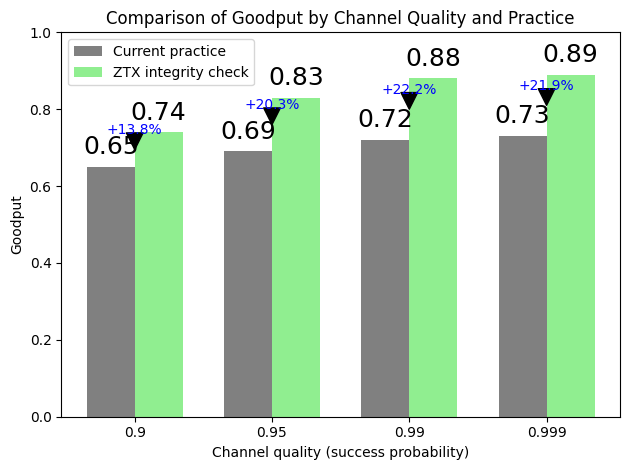

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
channel_quality = [0.9, 0.95, 0.99, 0.999]
current_practice = [0.65, 0.69, 0.72, 0.73]
ztx_integrity_check = [0.74, 0.83, 0.88, 0.89]

# Calculate percentage improvements
improvements = [(ztx - current) / current * 100 for ztx, current in zip(ztx_integrity_check, current_practice)]

# Plot the chart
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(channel_quality))

bars1 = ax.bar(index, current_practice, bar_width, label='Current practice', color='gray')
bars2 = ax.bar(index + bar_width, ztx_integrity_check, bar_width, label='ZTX integrity check', color='lightgreen')

# Add annotations for improvement
for i, (current, ztx, improvement) in enumerate(zip(current_practice, ztx_integrity_check, improvements)):
    ax.text(i, current + 0.02, f'{current:.2f}', ha='center', va='bottom', color='black', fontsize = 18)
    ax.text(i + bar_width, ztx + 0.02, f'{ztx:.2f}', ha='center', va='bottom', color='black', fontsize = 18)
    ax.annotate(f'+{improvement:.1f}%', xy=(i + bar_width / 2, (current + ztx) / 2),
                xytext=(i + bar_width / 2, (current + ztx) / 2 + 0.05),
                arrowprops=dict(facecolor='black', shrink=1),
                ha='center', va='center', fontsize=10, color='blue')

# Customize the plot
ax.set_xlabel('Channel quality (success probability)')
ax.set_ylabel('Goodput')
ax.set_title('Comparison of Goodput by Channel Quality and Practice')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(channel_quality)
ax.set_ylim(0, 1)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


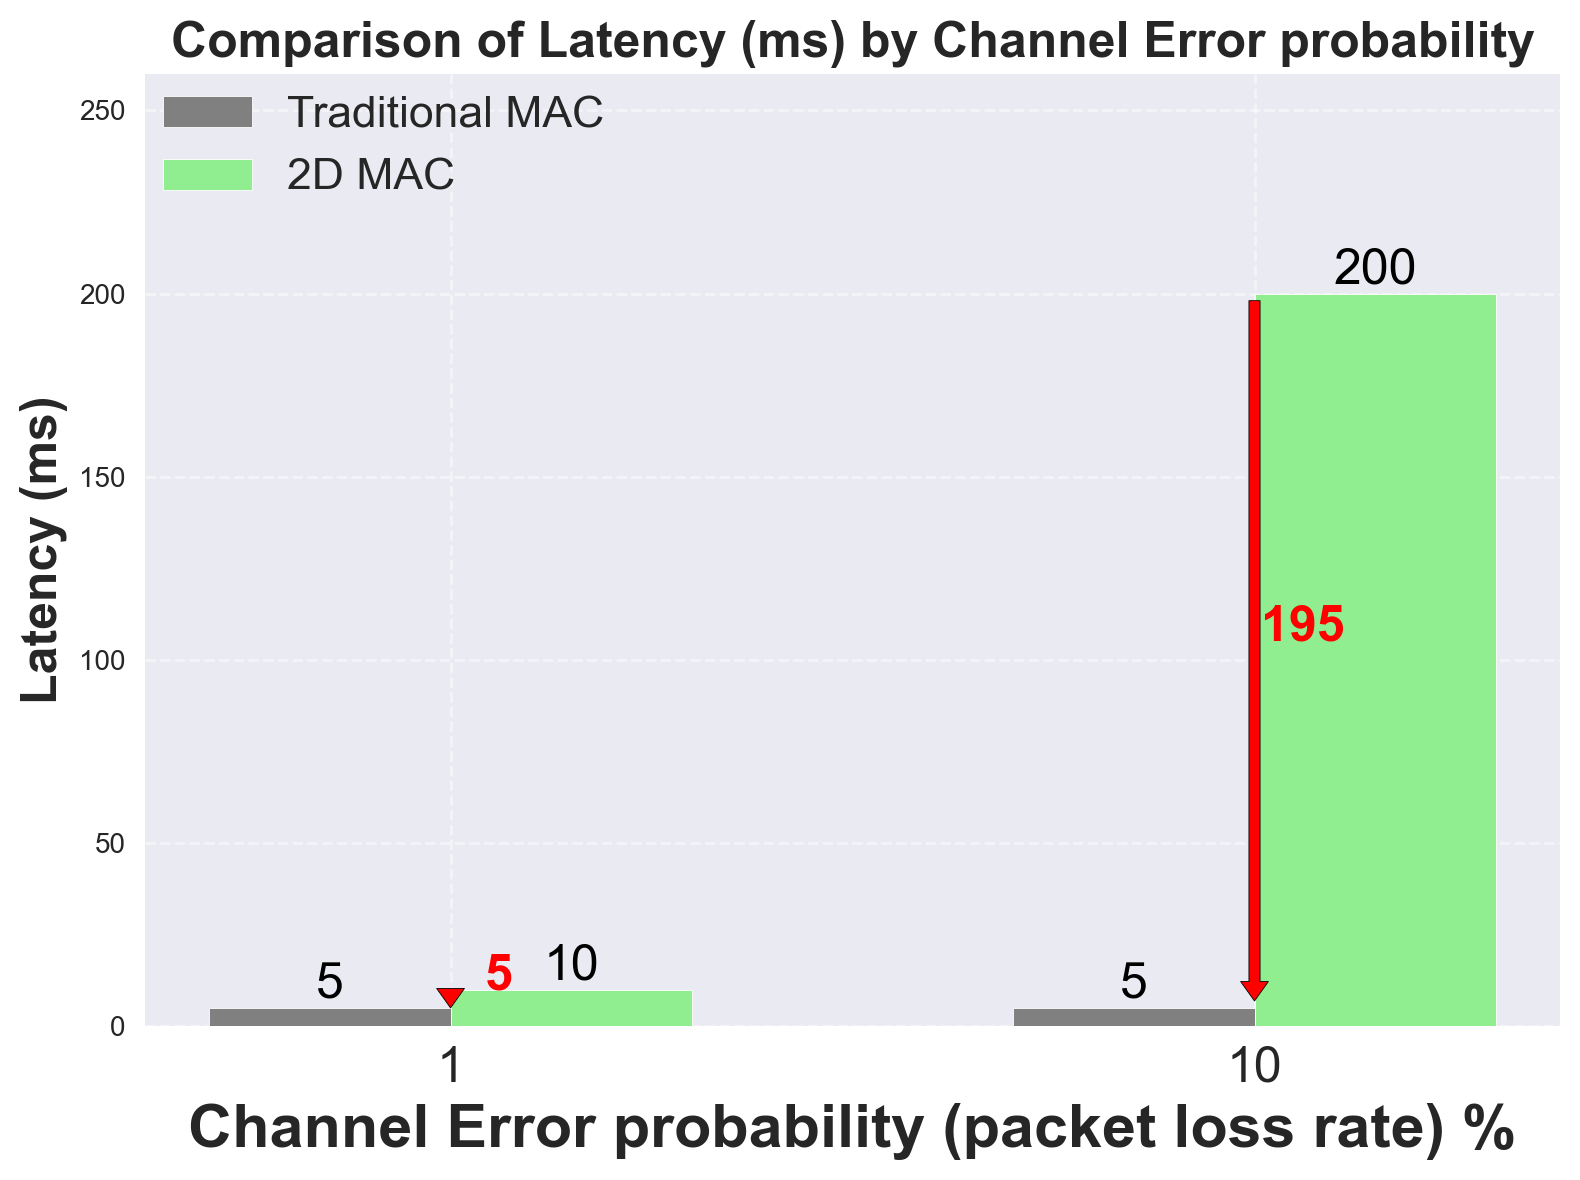

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided table
data = {
    "Channel quality (success probability)": [1, 10],
    "Current practice": [5, 5],
    "ZTX integrity check": [10, 200]
}


# Creating a DataFrame
df = pd.DataFrame(data)

improvements = [(ztx - current)  for ztx, current in zip(df["ZTX integrity check"], df["Current practice"])]



# Set bar width
bar_width = 0.3

# Set positions for each bar
r1 = range(len(df))
r2 = [x + bar_width for x in r1]


# Plotting the bar chart with labels
plt.style.use(plt.style.available[11])
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)

# Plot bars with labels
bars1 = ax.bar(r1, df["Current practice"], color='gray', width=bar_width, edgecolor='white', label='Traditional MAC')
bars2 = ax.bar(r2, df["ZTX integrity check"], color='lightgreen', width=bar_width, edgecolor='white', label='2D MAC')

# # Add labels to bars
# for bar in bars1:
#     yval = bar.get_height()
#     ax.text(bar.get_x()+ bar.get_width()/4.0, yval, round(yval, 2), va='bottom', fontsize = 18)  # va: vertical alignment

# for bar in bars2:
#     yval = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width()/4.0, yval, round(yval, 2), va='bottom',fontsize = 18)  # va: vertical alignment

for i, (current, ztx, improvement) in enumerate(zip(df["Current practice"], df["ZTX integrity check"], improvements)):
    ax.text(i, current + 0.02, f'{current:.0f}', ha='center', va='bottom', color='black', fontsize = 18)
    ax.text(i + bar_width, ztx + 0.02, f'{ztx:.0f}', ha='center', va='bottom', color='black', fontsize = 18)
    ax.annotate('', xy=(i + bar_width / 2, (current)),
                xytext=(i + bar_width / 2, (ztx )),
                arrowprops=dict(facecolor='red', shrink=0.01, headwidth=10, width=4, headlength=7),
                ha='center', va='center', fontsize=14, color='red') 
    ax.text(i + bar_width / 2 + .06, (ztx + current) / 2 - 0.03, f'{improvement:.0f}', ha='center', va='bottom', color='red', fontsize = 18, fontweight='bold')

# Add labels
ax.set_xlabel('Channel Error probability (packet loss rate) %', fontweight='bold', fontsize = 22)
ax.set_ylabel('Latency (ms)', fontweight='bold', fontsize = 18)
ax.set_title('Comparison of Latency (ms) by Channel Error probability', fontweight='bold', fontsize = 18)
ax.set_xticks([r + bar_width/2 for r in range(len(df))])
ax.set_xticklabels(df["Channel quality (success probability)"], fontsize = 18)

# Add legend

plt.grid(True, linestyle='--', alpha=0.5)
ax.legend(fontsize = 16, loc =[0, .85])
plt.ylim(0, 260)

plt.tight_layout()
plt.show()


